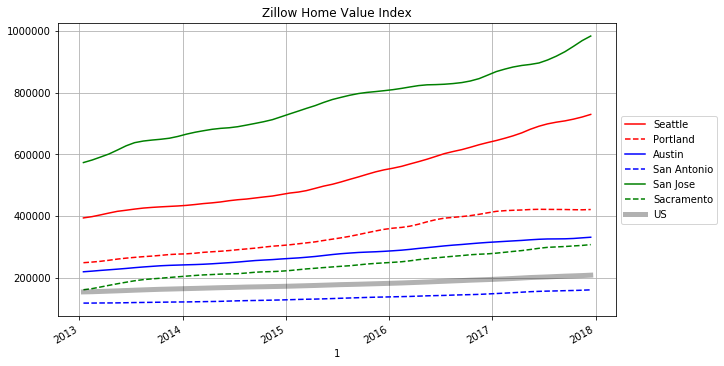

In [85]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# list of city state pairs
cityStatePairs = ['seattle-wa','portland-or','austin-tx','san-antonio-tx','san-jose-ca','sacramento-ca','united-states']
all_frames = []

# loop through and create list of dataframes for each city
for csp in cityStatePairs:
    df = pd.read_excel(open('Resources/'+csp+'.xls', 'rb'), sheet_name='All Homes', header=None)
    headers = df.iloc[1]
    new_df  = pd.DataFrame(df.values[2:], columns=headers)
    new_df.head()
    current_city_df = new_df.iloc[0]
    current_city_df = current_city_df.drop('Region Type')
    current_city_df = current_city_df.drop('Data Type')
    cc_df = pd.DataFrame(current_city_df)
    cc_df_tr = cc_df.transpose()
    all_frames.append(cc_df_tr)

# combine all df's into one
all_frames_df = pd.concat(all_frames)
# county_frames_df_2013.to_csv("Output/county_data_2013.csv", encoding="utf-8", index=True)
# all_frames_df = all_frames_df.set_index("City")
all_frames_df = all_frames_df.set_index('Region Name')

# show only years 2013-2017
yearsToDrop = ['2009','2010','2011','2012','2018','2019']
for yr in yearsToDrop:
    all_frames_df = all_frames_df[all_frames_df.columns.drop(list(all_frames_df.filter(regex=yr)))]
    
all_frames_df = all_frames_df.transpose()

all_frames_df.plot(kind='line', figsize=(10,6), legend=False, zorder=3)
plt.grid(zorder=0)

plt.gca().get_lines()[0].set_color("red")
plt.gca().get_lines()[1].set_color("red")
plt.gca().get_lines()[1].set_linestyle("dashed")
plt.gca().get_lines()[2].set_color("blue")
plt.gca().get_lines()[3].set_color("blue")
plt.gca().get_lines()[3].set_linestyle("dashed")
plt.gca().get_lines()[4].set_color("green")
plt.gca().get_lines()[5].set_color("green")
plt.gca().get_lines()[5].set_linestyle("dashed")
plt.gca().get_lines()[6].set_linewidth(5)
plt.gca().get_lines()[6].set_color("black")
plt.gca().get_lines()[6].set_alpha(.3)

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Zillow Home Value Index")

plt.show()

In [118]:
# get percent changes
for csp in cityStatePairs:
    if csp=="united-states":
        cityData = all_frames_df.loc[:,"US"]
        percentChange = ((cityData[len(cityData)-1]-cityData[0])/cityData[0])*100
        print(f'{csp} perc change --- {percentChange}')
    else:
        cityName = csp[:-3]
        cityData = all_frames_df.loc[:,cityName.title().replace("-", " ")]
        percentChange = ((cityData[len(cityData)-1]-cityData[0])/cityData[0])*100
        print(f'{csp} perc change --- {percentChange}')


seattle-wa perc change --- 85.24257048514097
portland-or perc change --- 69.44444444444444
austin-tx perc change --- 51.141552511415526
san-antonio-tx perc change --- 36.626916524701876
san-jose-ca perc change --- 71.58060013956734
sacramento-ca perc change --- 91.1014312383323
united-states perc change --- 35.32856213402732
